# Brain Bunch Simple Neural Network Demo

Welcome to the Brain Bunch's simple neural network demonstration! We will be learning about a very simple neural network built from scratch. This neural network has no hidden layers and if you want to learn more about it Google "perceptron".

The example and images are provided by Polycode and the Youtube tutorial:

https://www.youtube.com/watch?time_continue=144&v=kft1AJ9WVDk&feature=emb_title

## Background

So what does a neural network do anyways? A neural network **learns** from **previous information** in order to **create new information**. 

We must first teach a neural network what to do just like we teach ourselves. To do that, we must give the network data and tell them what data we want it to output. This will be our training data:

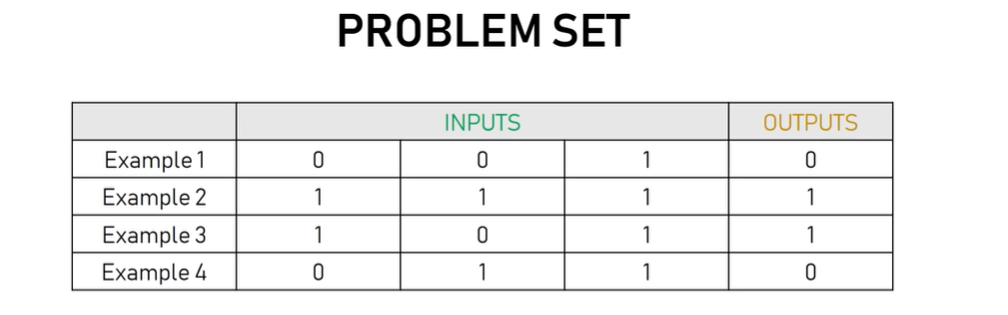

In this example we give the network 3 inputs and ask it to produce one output. **The neural network is not creating this by itself. We are first telling it that it should create these outputs and then it can decide for itself.**

Try to guess what the new output would be if we were given this input: 

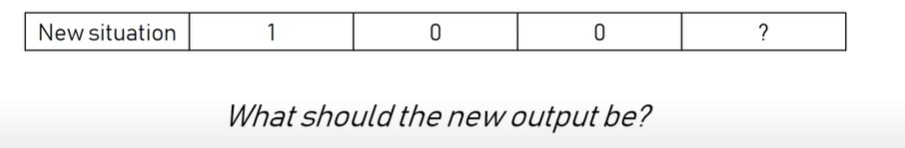




The correct answer for the output is **1**. No matter what the second and third inputs are, as long as the first input is one then the output will also be.

## Neural Network Visualization


The reasoning behind the neural network is a lot similar to how our brain functions. Inputs pass into a neuron and the neuron decides what output should come out.

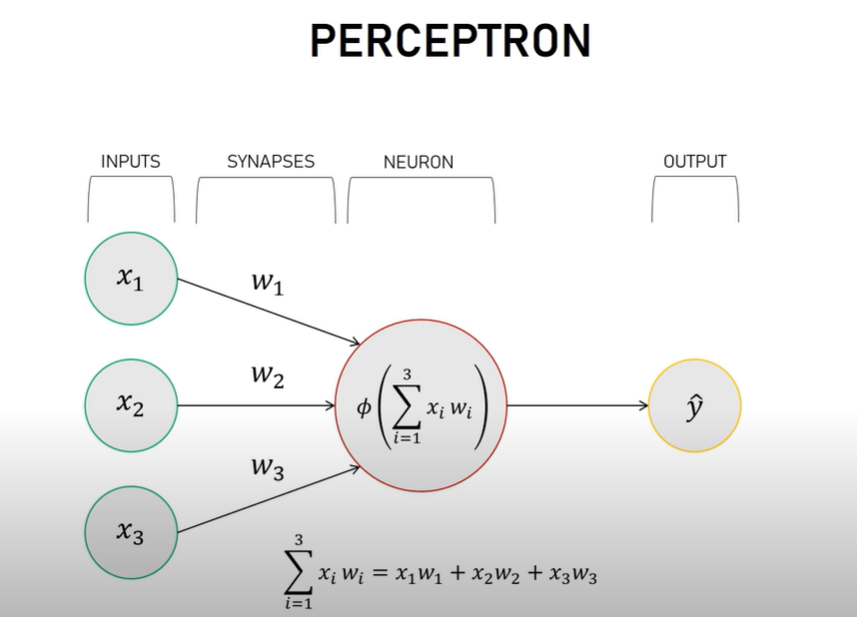

Before an input enters a neuron, weights (which are usually random numbers), modify the input to fine tune the input for the neuron. The weights are multiplified to the input and then added together to make one input number. Do not be worried about the $\sum$ symbol. It is just a shorter way to write down the sum of the three numbers. 

A neuron then uses a mathematical formula to produce the output. This formula is represented as $\phi$ and is called a sigmoid function: 

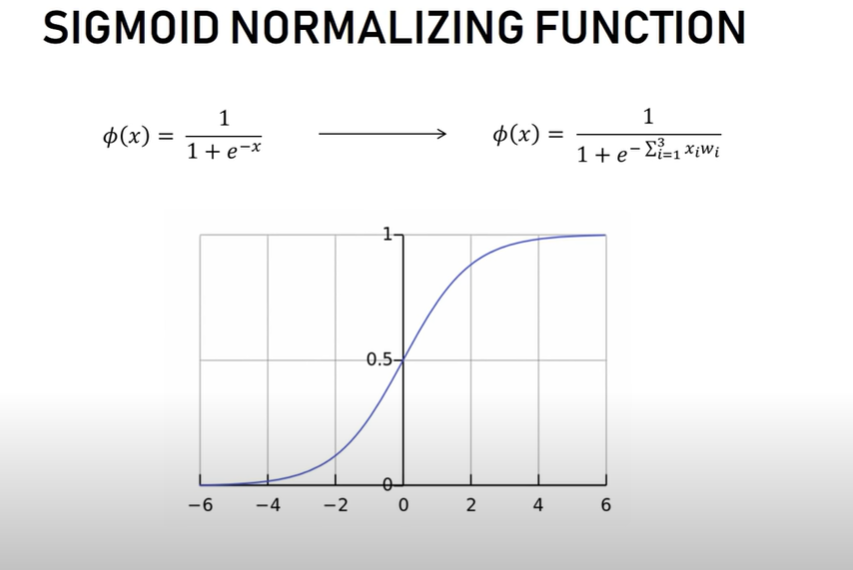

This function takes in one number, which we found by taking the sum of weighted inputs, and spits out our output. 

Now let's get to the code!

## Code

You won't neccesarily have to understand the specifics behind the code. A lot of requires calculus and linear algebra which is college level math. Just follow along with the comments in between the lines of code (they start with a "#").

In [2]:
import numpy as np

# First, we must write the sigmoid function in Python. 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# The training set, with 4 examples consisting of 3 input values and 1 output value
training_inputs = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,1],
                            [0,1,1]])

print("This is what training inputs looks like:")
print(training_inputs)


training_outputs = np.array([[0,1,1,0]]).T # <-- Transpose of the matrix/array

print("This is what the training outputs looks like:" )
print(training_outputs)

This is what training inputs looks like:
[[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
This is what the training outputs looks like:
[[0]
 [1]
 [1]
 [0]]


### Weights 

The goal of training is to find the correct weights for each input. Similar to the brain, it is how many chemicals from other sources in the synapse bind to the neuron. By finding the weights, we can quantify how much each input matters in determining the output. To begin, we randomly generate weights. If we're extremely lucky, these weights would be the correct ones needed. But in most cases, we have to continuously generate new weights until we get closer and closer to our desired output. 

In [3]:
# Seed the random number generator
# A seed makes the random number generator always generate the same random numbers each time.
np.random.seed(1) 

synaptic_weights = 2 * np.random.random((3, 1)) - 1
# this ensures that the random number generated is between -1 and 1

print("Random starting synaptic weights: ")
print(synaptic_weights)

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


### Training 

Now comes to the meat and bones of the training process. Now that we have these weights, we can start training. 
The process is as follows:

1. Take the inputs from the training data and calculate the output using the neuron's sigmoid formula.
2. Calculate the error, which is the different between our output and the intended output.
3. Adjust weights based on how large the error is.
4. Rinse and repeat this process 20,000 times. 

The process is illustrated like this: 

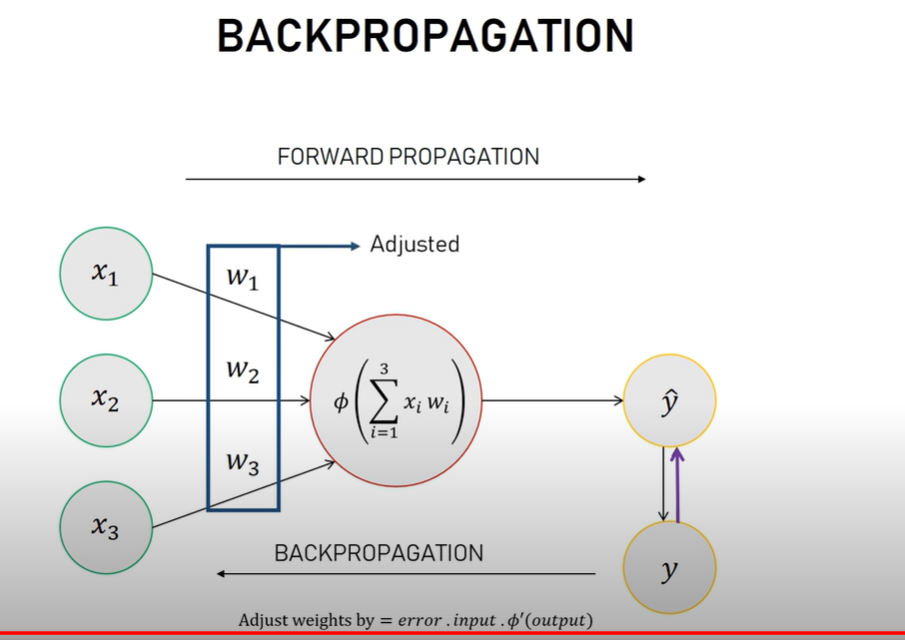


The carrot(^) over the y represents our output while the regular y represents expected output. First the network sends in inputs through forward propogation and then the network responds and edits the inputs with back propogation.

In [4]:
# Training

# To calculate how much we have to adjust the weights, we have to use the derivative of the sigmoid formula.
# This is commonly called "backpropogation"
def sigmoid_derivative(x):
    return x * (1 - x)

print("Training...")
for iteration in range(20000): # run process 20,0000 times
    # Pass training set through the neural network
    input_layer = training_inputs
    
    outputs = sigmoid(np.dot(input_layer, synaptic_weights))

    # Calculate the error rate
    error = training_outputs - outputs

    # Multiply error by input and gradient of the sigmoid function
    # Less confident weights are adjusted more through the nature of the function
    adjustments = error * sigmoid_derivative(outputs)
    
    # Adjust synaptic weights
    synaptic_weights += np.dot(input_layer.T, adjustments)

print("Synaptic weights after training: ")
print(synaptic_weights)

print("Outputs after training: ")
print(outputs)
    

Training...
Synaptic weights after training: 
[[10.38040701]
 [-0.20641179]
 [-4.98452047]]
Outputs after training: 
[[0.00679672]
 [0.99445583]
 [0.99548516]
 [0.00553614]]


## Results 

We can see that the outputs are close to our desired outputs after 20,000 cycles. However, they are not perfect. Sometimes, neural networks, like our brains, are not perfect even after a lot of training. We can see that the weight for the 1st input is extremely high compared to the other ones, meaning that the neural network has discovered, on its own, that the first input should be the most important in determing the ouput. 

And we're done! 
Feel free to change the numbers in the inputs and outputs and trying running the code again and checking out you're results.

Try inputting you're own input and output! Change the inputs and the outputs and see the neural network do its magic!

Try changing the numbers in the np.array()!

In [7]:
# The training set, with 4 examples consisting of 3 input values and 1 output value
training_inputs = np.array([[1,0,1],
                            [0,1,1],
                            [1,1,1],
                            [0,1,1]]) # <- CHANGE ME

print("This is what training inputs looks like:")
print(training_inputs)

training_outputs = np.array([[0,1,1,0]]).T # <-- Transpose of the matrix/array # CHANGE ME

print("This is what the training outputs looks like:" )
print(training_outputs)

This is what training inputs looks like:
[[1 0 1]
 [0 1 1]
 [1 1 1]
 [0 1 1]]
This is what the training outputs looks like:
[[0]
 [1]
 [1]
 [0]]


Now run this code and see the results!

In [8]:
import numpy as np



# note there is no seed this time! so you're answers will change everytime you run this
np.random.seed() #this creates a random seed 

synaptic_weights = 2 * np.random.random((3, 1)) - 1
# this ensures that the random number generated is between -1 and 1

print("Random starting synaptic weights: ")
print(synaptic_weights)

print("Training...")
for iteration in range(20000): # run process 20,0000 times
    # Pass training set through the neural network
    input_layer = training_inputs
    
    outputs = sigmoid(np.dot(input_layer, synaptic_weights))

    # Calculate the error rate
    error = training_outputs - outputs

    # Multiply error by input and gradient of the sigmoid function
    # Less confident weights are adjusted more through the nature of the function
    adjustments = error * sigmoid_derivative(outputs)
    
    # Adjust synaptic weights
    synaptic_weights += np.dot(input_layer.T, adjustments)

print("Synaptic weights after training: ")
print(synaptic_weights)

print("Outputs after training: ")
print(outputs)
    

Random starting synaptic weights: 
[[-0.23940798]
 [-0.87662611]
 [ 0.93340867]]
Training...
Synaptic weights after training: 
[[ 4.45721486]
 [ 9.02929362]
 [-9.02867073]]
Outputs after training: 
[[0.01023727]
 [0.50015573]
 [0.98854504]
 [0.50015573]]


If you're wondering what a sigmoid derivative looks like: 

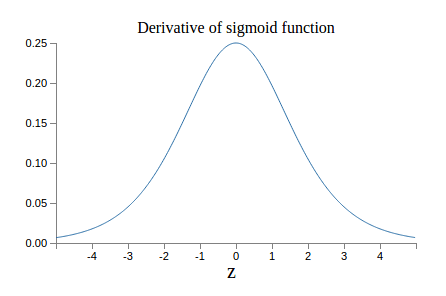

By the calculation of the adjustments, smaller numbers means more adjustments and larger numbers mean less adjustments!